# Sprint19 Unet

# 事前準備

《GPU環境での学習》


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。



https://github.com/zhixuhao/unet よりダウンロードしてきたプログラム一式が入ったディレクトリの中に、このSprint19.ipynbを入れる

# 問題1　学習と推定

まずは、main.pyが正常に動くことを確認しておく。

その後、https://www.kaggle.com/c/tgs-salt-identification-challenge/data データを使って、学習を行っていきます。

## ①サンプルデータセットで動かしてみる

In [ ]:

!pip install tensorflow-gpu==1.14.0
!pip install keras==2.2.0
!pip install keras-applications==1.0.7

  Using cached Keras_Preprocessing-1.0.1-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Applications-1.0.2-py2.py3-none-any.whl (43 kB)
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras-applications
    Found existing installation: Keras-Applications 1.0.7
    Uninstalling Keras-Applications-1.0.7:
      Successfully uninstalled Keras-Applications-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.14.0 requires keras-applications>=1.0.6, but you have keras-applications 1.0.2 which is incompatible.
tensorflow 1.14.0 requires keras-preprocessing>=1.0.5, but you have keras-preprocessing 1.0.1 which is incompatible.
tensorflow-gpu 1.14.0 requires keras-applications>

In [ ]:
!pip install tensorflow==1.14.0

In [ ]:
import os

In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Sprint19 U-net/unet-master')


In [ ]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("data/membrane/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

/content/drive/MyDrive/Colab Notebooks/Sprint19 U-net/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/1
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
300/300 [==============================] - 4618s 15s/step - loss: 0.3356 - acc: 0.8541

Epoch 00001: loss improved from inf to 0.33560, saving model to unet_membrane.hdf5
30/30 [==============================] - 61s 2s/step


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14388489365460919301, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10255392045483449074
 physical_device_desc: "device: XLA_CPU device"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%pwd

'/content/drive/My Drive/Colab Notebooks/Sprint19 U-net/unet-master'

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Sprint19 U-net/unet-master

/content/drive/MyDrive/Colab Notebooks/Sprint19 U-net/unet-master


## ②データ準備

unetのcloneしてきたフォルダの中に、このsprint19.ipynbファイルが入っているかと思います。

この状態で、https://www.kaggle.com/c/tgs-salt-identification-challenge/data からダウンロードしてきたデータを、unetフォルダの中に置きましょう。

最終的に、下記のようなフォルダ・ファイル構成になっているものとします。

unet/

    ・・・・
    Sprint19.ipynb
    competition_data/
        train/
        test/
        depths.csv
    ・・・・

In [ ]:
%ls

data/              img/     model.py      Sprint19.ipynb   unet_membrane.hdf5
dataPrepare.ipynb  LICENSE  __pycache__/  train/           Untitled0.ipynb
data.py            main.py  README.md     trainUnet.ipynb


## ③ライブラリのimport

この③以降は、unetリポジトリの内部のコードを抜粋してきてあります。

In [ ]:
import glob
import cv2
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

## ④データ読み込み

In [28]:
# 画像パス一覧
image_path_list = glob.glob("train/images/*")

# データ格納用リスト
X_train=[]
y_train=[]

# 画像パスでループ
for image_path in image_path_list[:100]:
    # 画像
    image = cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)/255, (256, 256))
    X_train.append(image)
    # セグメンテーション領域
    print(image_path)
    print(image_path.replace("images","masks"))
    x = cv2.imread(image_path.replace("images","masks"), cv2.IMREAD_GRAYSCALE)
    print(x)
    mask = cv2.resize(cv2.imread(image_path.replace("images","masks"), cv2.IMREAD_GRAYSCALE)/255, (256, 256))
    y_train.append(mask)


# numpy配列化
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape, y_train.shape)

# 学習用に形整える
X_train = np.expand_dims(X_train, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
print(X_train.shape, y_train.shape)

train/images/df8d9625c0.png
train/masks/df8d9625c0.png
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
train/images/d369e6b550.png
train/masks/d369e6b550.png
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
train/images/c72c5ee731.png
train/masks/c72c5ee731.png
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
train/images/6397715bb4.png
train/masks/6397715bb4.png
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
train/images/77420e5628.png
train/masks/77420e5628.png
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [2

## ⑤モデル定義

In [29]:
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

model = unet()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


## ⑥学習

In [32]:
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit(X_train,y_train,batch_size=3,epochs=1,callbacks=[model_checkpoint])

Epoch 1/1
100/100 [==============================] - 763s 8s/step - loss: 0.6887 - acc: 0.7431

Epoch 00001: loss improved from inf to 0.68868, saving model to unet_membrane.hdf5


## ⑦推定

In [33]:
y_pred = model.predict(np.array([X_train[0,:,:]]))

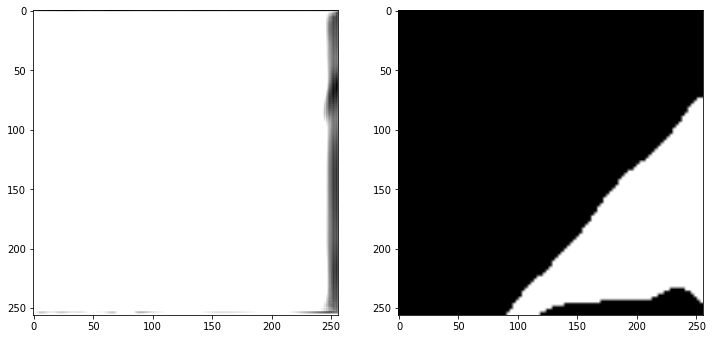

In [37]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(y_pred[0,:,:,0], cmap='gray')
ax[1].imshow(y_train[0,:,:,0], cmap='gray')

# 問題2　コードリーディング

論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

https://github.com/zhixuhao/unet

- 逆畳み込みにより、畳み込み前の大きさに近づけていっている（upsampling）
- 逆畳み込み時は、同階層の者をコピペしてきている(copy)


model.pyのuneｔメソッドでunetを実装している。
conv1からconv5が畳み込みを行い、conv6からconv10までがskip-conectionからの情報をもとに逆畳み込みをおこなている。